In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\datascience\maps.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Creating Tables
Way 1: Reading from a file

## Review

In [2]:
nba = Table.read_table('data/nba_salaries.csv')
nba.show(6)

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000
4,Juwan Howard,PF,Washington Wizards,15000000,2000
5,Scottie Pippen,SF,Portland Trail Blazers,14795000,2000
6,Karl Malone,PF,Utah Jazz,14000000,2000


**Discussion Question 1**:
- Write a code expression which contains the proportion of all salaries greater than $15M.

In [3]:
number_of_rows = nba.num_rows

In [4]:
number_of_rich_players = nba.where('salary', are.above(15000000)).num_rows

In [5]:
number_of_rich_players/number_of_rows

0.05657783417935702

**Discussion Question 2:**
- After evaluating all of the expressions in order, what's the result of the last one?

In [6]:
department = make_array("Stat", "Stat", "Stat", "Stat", "Data")
classes = make_array("20", "20", "C131A", "20", "C8")

career = Table().with_columns("Semester", np.arange(1, 5),
                     "Dept", department,
                    "Class", classes)

career.drop('Semester').where('Dept', 'Data')

career.num_rows*career.num_columns

ValueError: Column length mismatch. New column does not have the same number of rows as table.

## Census ##

In [7]:
full = Table.read_table('data/nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [8]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial.show(5)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [9]:
us_pop = partial.relabeled(2, '2014').relabeled(3, '2019')
us_pop.show(5)

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


_____

#### Discussion 
- What do you notice about this table? (1 min) 

In [10]:
us_pop.where('AGE',18)

SEX,AGE,2014,2019
0,18,4221344,4255827
1,18,2162067,2172385
2,18,2059277,2083442


In [11]:
us_pop.where('SEX',0)

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


#### Discussion (1 min)
- What do you notice about this table? There are *two* things I notice that are interesting!!

In [12]:
us_pop.where('SEX',0).sort('AGE', descending=True).show(6)

SEX,AGE,2014,2019
0,999,318301008,328239523
0,100,70685,100322
0,99,41277,57124
0,98,59546,86150
0,97,82948,116969
0,96,120427,157463


In [13]:
us_pop.where('AGE',999)

SEX,AGE,2014,2019
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199


### **Summarizing our data: 2019 sex ratios**

In [14]:
us_pop_2019 = us_pop.drop('2014')
us_pop_2019.show(3)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044


In [15]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females.show(3)

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500


In [16]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males.show(3)

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544


In [17]:
f_to_m_ratios = females.column('2019') / males.column('2019')

ratios = Table().with_columns(
    'Age', females.column('AGE'),
    'F:M Ratio', f_to_m_ratios
)

ratios.show(6)

Age,F:M Ratio
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338


In [18]:
ratios.sort('Age', descending=True).show(5)

Age,F:M Ratio
100,3.27411
99,2.91367
98,2.65926
97,2.5868
96,2.41969


### **Data visualization: line plot**

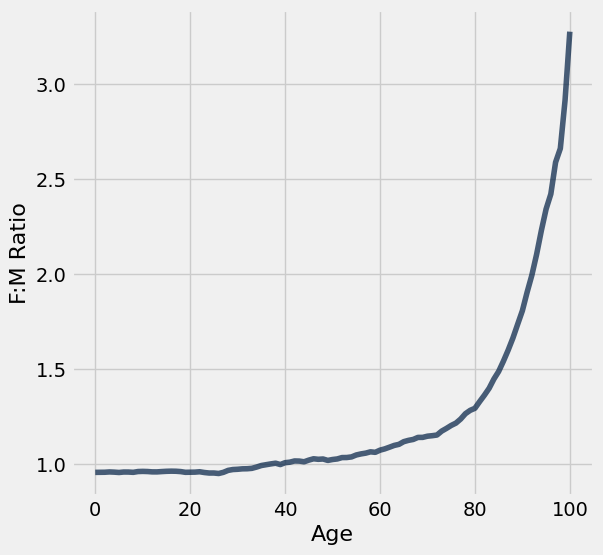

In [19]:
ratios.plot('Age', 'F:M Ratio')